In [1]:
import pandas as pd
import re
import numpy as np
import numbers
pd.set_option('display.max_rows', 500)

# Neighborhoods

In [2]:
neighbourhoods= ['Meilahti','Herttoniemi','Sörnäinen','Hermanni','Munkkiniemi','Vallila','Ullanlinna','Ruskeasuo','Pakila','Mellunkylä','Vanhakaupunki','Tuomarinkylä','Kulosaari','Kumpula','Kaarela','Kaartinkaupunki','Länsisatama','Alppiharju','Katajanokka','Pitäjänmäki','Lauttasaari','Pukinmäki','Laakso','Käpylä','Punavuori','Koskela','Etu-Töölö','Kaivopuisto','Laajasalo','Tammisalo','Suutarila','Santahamina','Kluuvi','Viikki','Taka-Töölö','Haaga','Kruununhaka','Vuosaari','Kallio','Vartiokylä','Malmi','Suurmetsä','Tapaninkylä','Pasila','Oulunkylä','Kamppi','Toukola','Eira','Konala']

### Excluded neighborhoods
- Aluemeri
- Mustikkamaa-korkeasaari
- Ulkosaaret
- Suomenlinna
- Salmenkallio, ei dataa
- Vartiosaari, ei dataa
- Villinki,ei dataa
- Talosaari,ei dataa
- Karhusaari
- Östersundom
- Ultuna

In [3]:
len(neighbourhoods)

49

## Addresses
Used for identification of neighborhoods

In [ ]:
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

In [ ]:
locator = Nominatim(user_agent="my_helsinki_explorer")

In [ ]:
location = locator.geocode('Helsinki 00450')
location

In [ ]:
nh=kauppahinnat.loc[84,'Postinumeroalue']
print(nh)
nh in neighbourhoods

# Price of estate, Euro/square meter


### Exceptions
- Pikku-Huopalahti 00300 kuuluu kolmeen kaupunginosaa, pois?
- Vallila - Hermanni 00550 kattaa kaksi kaupunginosaa,?
- Toukola - Vanhakaupunki 00560 kattaa kaksi kaupunginosaa
- Östersundomin suurpiiri ei ole mukana

In [4]:
price=pd.read_excel('HKITilastot/3. Asuminen.xls',sheet_name='3.14')
price.drop(range(0,6),inplace=True)
price.drop(range(85,91),inplace=True)
price.drop([6,7,8],inplace=True)
price.drop('Vanhojen asunto-osakehuoneistojen kauppahinnat Helsingin postinumeroalueilla vuosina 2010–20171',axis=1,inplace=True)
price.rename(columns={'Unnamed: 1':'Postinumeroalue'},inplace=True)
price.rename(columns={'Unnamed: 2':'2010'},inplace=True)
price.rename(columns={'Unnamed: 3':'2013'},inplace=True)
price.rename(columns={'Unnamed: 4':'2014'},inplace=True)
price.rename(columns={'Unnamed: 5':'2015'},inplace=True)
price.rename(columns={'Unnamed: 6':'2016'},inplace=True)
price.rename(columns={'Unnamed: 7':'2017'},inplace=True)
#price.rename(columns={'Vanhojen asunto-osakehuoneistojen price Helsingin postinumeroalueilla vuosina 2010–20171':'Postinumero'},inplace=True)

price['Postinumeroalue']=price['Postinumeroalue'].replace(regex='(-Vik, Ladugården)|(- .+)',value='')
price['Postinumeroalue']=price['Postinumeroalue'].replace(regex=' +$',value='')
price['Postinumeroalue']=price['Postinumeroalue'].replace(regex='^ +',value='')

#### Neigborhood identification is manual work, unfortunately

In [5]:
price.loc[9,'Neigborhood']='Kluuvi'
price.loc[10,'Neigborhood']='Punavuori'
price.loc[11,'Neigborhood']='Kaartinkaupunki'
price.loc[12,'Neigborhood']='Kaivopuisto'
price.loc[13,'Neigborhood']='Eira'
price.loc[14,'Neigborhood']='Katajanokka'
price.loc[15,'Neigborhood']='Kruununhaka'
price.loc[16,'Neigborhood']='Länsisatama'
price.loc[17,'Neigborhood']='Lauttasaari'
price.loc[18,'Neigborhood']='Lauttasaari'
price.loc[19,'Neigborhood']='Pasila'
price.loc[20,'Neigborhood']='Taka-Töölö'
price.loc[21,'Neigborhood']='Taka-Töölö'
price.loc[22,'Neigborhood']='Meilahti'
price.loc[23,'Neigborhood']='Ruskeasuo'

price.loc[25,'Neigborhood']='Haaga'
price.loc[26,'Neigborhood']='Haaga'
price.loc[27,'Neigborhood']='Munkkiniemi'
price.loc[28,'Neigborhood']='Munkkiniemi'
price.loc[29,'Neigborhood']='Munkkiniemi'
price.loc[30,'Neigborhood']='Pitäjänmäki'
price.loc[31,'Neigborhood']='Pitäjänmäki'
price.loc[32,'Neigborhood']='Pitäjänmäki'
price.loc[33,'Neigborhood']='Konala'
price.loc[34,'Neigborhood']='Haaga'
price.loc[35,'Neigborhood']='Kaarela'
price.loc[36,'Neigborhood']='Kaarela'
price.loc[37,'Neigborhood']='Kaarela'
price.loc[38,'Neigborhood']='Haaga'
price.loc[39,'Neigborhood']='Sörnäinen'
price.loc[40,'Neigborhood']='Vallila'
price.loc[41,'Neigborhood']='Pasila'
price.loc[42,'Neigborhood']='Kallio'
price.loc[43,'Neigborhood']='Sörnäinen'
price.loc[44,'Neigborhood']='Hermanni'
price.loc[45,'Neigborhood']='Toukola'
price.loc[46,'Neigborhood']='Kulosaari'
price.loc[47,'Neigborhood']='Sörnäinen'
price.loc[48,'Neigborhood']='Koskela'
price.loc[49,'Neigborhood']='Käpylä'
price.loc[50,'Neigborhood']='Oulunkylä'
price.loc[51,'Neigborhood']='Oulunkylä'
price.loc[52,'Neigborhood']='Oulunkylä'
price.loc[53,'Neigborhood']='Oulunkylä'
price.loc[54,'Neigborhood']='Pakila'
price.loc[55,'Neigborhood']='Tuomarinkylä'
price.loc[56,'Neigborhood']='Pakila'
price.loc[57,'Neigborhood']='Tuomarinkylä'
price.loc[58,'Neigborhood']='Malmi'
price.loc[59,'Neigborhood']='Malmi'
price.loc[60,'Neigborhood']='Pukinmäki'
price.loc[61,'Neigborhood']='Tapaninkylä'
price.loc[62,'Neigborhood']='Suutarila'
price.loc[63,'Neigborhood']='Suurmetsä'
price.loc[64,'Neigborhood']='Suurmetsä'
price.loc[65,'Neigborhood']='Suurmetsä'
price.loc[66,'Neigborhood']='Tapaninkylä'
price.loc[67,'Neigborhood']='Viikki'
price.loc[68,'Neigborhood']='Herttoniemi'
price.loc[69,'Neigborhood']='Herttoniemi'
price.loc[70,'Neigborhood']='Herttoniemi'
price.loc[71,'Neigborhood']='Tammisalo'
price.loc[72,'Neigborhood']='Laajasalo'
price.loc[73,'Neigborhood']='Laajasalo'
price.loc[74,'Neigborhood']='Laajasalo'
price.loc[75,'Neigborhood']='Vartiokylä'
price.loc[76,'Neigborhood']='Vartiokylä'
price.loc[77,'Neigborhood']='Vartiokylä'
price.loc[78,'Neigborhood']='Vartiokylä'
price.loc[79,'Neigborhood']='Mellunkylä'
price.loc[80,'Neigborhood']='Vartiokylä'
price.loc[81,'Neigborhood']='Vuosaari'
price.loc[82,'Neigborhood']='Mellunkylä'
price.loc[83,'Neigborhood']='Vuosaari'
price.loc[84,'Neigborhood']='Vuosaari'

price.loc[85,'Postinumeroalue']='Vanhakaupunki'
price.loc[85,'2017']=price.loc[45,'2017']
price.loc[85,'Neigborhood']='Vanhakaupunki'

price.loc[86,'Postinumeroalue']='Ullanlinna'
price.loc[86,'2017']=price.loc[12,'2017']
price.loc[86,'Neigborhood']='Ullanlinna'

price.loc[87,'Postinumeroalue']='Kumpula'
price.loc[87,'2017']=price.loc[45,'2017']
price.loc[87,'Neigborhood']='Kumpula'

price.loc[88,'Postinumeroalue']='Alppiharju'
price.loc[88,'2017']=price.loc[40,'2017']
price.loc[88,'Neigborhood']='Alppiharju'

price.loc[89,'Postinumeroalue']='Laakso'
price.loc[89,'2017']=price.loc[64,'2017']
price.loc[89,'Neigborhood']='Laakso'

price.loc[90,'Postinumeroalue']='Etu-Töölö'
price.loc[90,'2017']=price.loc[9,'2017']
price.loc[90,'Neigborhood']='Etu-Töölö'

price.loc[91,'Postinumeroalue']='Santahamina'
price.loc[91,'2017']=price.loc[72,'2017']
price.loc[91,'Neigborhood']='Santahamina'

price.loc[92,'Postinumeroalue']='Kamppi'
price.loc[92,'2017']=price.loc[9,'2017']
price.loc[92,'Neigborhood']='Kamppi'

#price.drop(24,inplace=True) #not included

### Coverage

In [6]:
for ko in neighbourhoods:
    if not ko in set(price['Neigborhood']):
        print("{} - not found".format(ko))

# Population

In [7]:
population=pd.read_excel('HKITilastot/2. Väestö.xls',sheet_name='2.3')

population.rename(columns={'Unnamed: 1':'1990'},inplace=True)
population.rename(columns={'Unnamed: 2':'2000'},inplace=True)
population.rename(columns={'Unnamed: 3':'2010'},inplace=True)
population.rename(columns={'Unnamed: 4':'2015'},inplace=True)
population.rename(columns={'Unnamed: 5':'2018'},inplace=True)
population.rename(columns={'Unnamed: 6':'2028'},inplace=True)
population.rename(columns={'Väestö 1.1.1990–2018 sekä väestöennuste 1.1.2028 piireittäin ja osa-alueittain':'Alue'},inplace=True)

population.drop([0,1,2,4,7,263,265,266],inplace=True)
population.dropna(how='all',inplace=True)
population.dropna(subset=['Alue'],inplace=True)

population=population[population['Alue']!='%']

population['Alue']=population['Alue'].replace(regex='(\d+.? +)|( ?- .+)',value='')
population['Alue']=population['Alue'].replace(regex='(^\s+)|(\s+$)',value='')


population.drop([196],inplace=True)
population.loc[197,'Alue']='Herttoniemen yritysalue'
population.loc[198,'Alue']='Herttoniemenranta'#fix typo

population.drop([206],inplace=True)
population.loc[207,'Alue']='Kruunuvuorenranta'

population.drop([74],inplace=True)
population.loc[75,'Alue']='Pitäjänmäen yritysalue'

population.drop([221],inplace=True)
population.loc[222,'Alue']='Roihupelto'

#population

In [8]:
population.set_index('Alue',inplace=True)
population.sort_index(inplace=True)

In [9]:
for area in set(population.index.values):
    if area in neighbourhoods:
        population.loc[area,'Neigborhood']=area
        

population.loc['Sörnäinen','Neigborhood']=None
population.loc['Vilhonvuori','Neigborhood']='Sörnäinen'
population.loc['Kalasatama','Neigborhood']='Sörnäinen'
population.loc['Sompasaari','Neigborhood']='Sörnäinen'
population.loc['Hanasaari','Neigborhood']='Sörnäinen'
        
        
population.loc['Hermanni','Neigborhood']=None
population.loc['Hermanninmäki','Neigborhood']='Hermanni'
population.loc['Kyläsaari','Neigborhood']='Hermanni'
        
        
population.loc['Lauttasaari','Neigborhood']=None
population.loc['Kotkavuori','Neigborhood']='Lauttasaari'
population.loc['Vattuniemi','Neigborhood']='Lauttasaari'
population.loc['Myllykallio','Neigborhood']='Lauttasaari'
population.loc['Koivusaari','Neigborhood']='Lauttasaari'

population.loc['Harju','Neigborhood']='Alppiharju'
population.loc['Alppila','Neigborhood']='Alppiharju'

population.loc['Lassila','Neigborhood']='Haaga'
population.loc['Kivihaka','Neigborhood']='Haaga'
population.loc['Etelä-Haaga','Neigborhood']='Haaga'
population.loc['Pohjois-Haaga','Neigborhood']='Haaga'

population.loc['Länsi-Herttoniemi','Neigborhood']='Herttoniemi'
population.loc['Roihuvuori','Neigborhood']='Herttoniemi'
population.loc['Herttoniemen yritysalue','Neigborhood']='Herttoniemi'
population.loc['Herttoniemenranta','Neigborhood']='Herttoniemi'

population.loc['Kannelmäki','Neigborhood']='Kaarela'
population.loc['Maununneva','Neigborhood']='Kaarela'
population.loc['Malminkartano','Neigborhood']='Kaarela'
population.loc['Hakuninmaa','Neigborhood']='Kaarela'
population.loc['Kuninkaantammi','Neigborhood']='Kaarela'
population.loc['Honkasuo','Neigborhood']='Kaarela'

population.loc['Siltasaari','Neigborhood']='Kallio'
population.loc['Linjat','Neigborhood']='Kallio'
population.loc['Torkkelinmäki','Neigborhood']='Kallio'

population.loc['Yliskylä','Neigborhood']='Laajasalo'
population.loc['Jollas','Neigborhood']='Laajasalo'
population.loc['Tullisaari','Neigborhood']='Laajasalo'
population.loc['Hevossalmi','Neigborhood']='Laajasalo'

population.loc['Ruoholahti','Neigborhood']='Länsisatama'
population.loc['Jätkäsaari','Neigborhood']='Länsisatama'
population.loc['Hernesaari','Neigborhood']='Länsisatama'

population.loc['Pihlajisto','Neigborhood']='Malmi'
population.loc['Tattariharju','Neigborhood']='Malmi'
population.loc['Pihlajamäki','Neigborhood']='Malmi'
population.loc['Ala-Malmi','Neigborhood']='Malmi'
population.loc['Ylä-Malmi','Neigborhood']='Malmi'
population.loc['Malmin lentokenttä','Neigborhood']='Malmi'

population.loc['Kontula','Neigborhood']='Mellunkylä'
population.loc['Vesala','Neigborhood']='Mellunkylä'
population.loc['Mellunmäki','Neigborhood']='Mellunkylä'
population.loc['Kivikko','Neigborhood']='Mellunkylä'
population.loc['Kurkimäki','Neigborhood']='Mellunkylä'

population.loc['Talinranta','Neigborhood']='Munkkiniemi'
population.loc['Niemenmäki','Neigborhood']='Munkkiniemi'
population.loc['Munkkivuori','Neigborhood']='Munkkiniemi'
population.loc['Lehtisaari','Neigborhood']='Munkkiniemi'
population.loc['Kuusisaari','Neigborhood']='Munkkiniemi'
population.loc['Vanha Munkkiniemi','Neigborhood']='Munkkiniemi'

population.loc['Pirkkola','Neigborhood']='Oulunkylä'
population.loc['Maunula','Neigborhood']='Oulunkylä'
population.loc['Metsälä','Neigborhood']='Oulunkylä'
population.loc['Patola','Neigborhood']='Oulunkylä'
population.loc['Veräjämäki','Neigborhood']='Oulunkylä'
population.loc['Maunulanpuisto','Neigborhood']='Oulunkylä'
population.loc['Veräjälaakso','Neigborhood']='Oulunkylä'

population.loc['Länsi-Pakila','Neigborhood']='Pakila'
population.loc['Itä-Pakila','Neigborhood']='Pakila'

population.loc['Länsi-Pasila','Neigborhood']='Pasila'
population.loc['Itä-Pasila','Neigborhood']='Pasila'
population.loc['Keski-Pasila','Neigborhood']='Pasila'

population.loc['Pajamäki','Neigborhood']='Pitäjänmäki'
population.loc['Tali','Neigborhood']='Pitäjänmäki'
population.loc['Reimarla','Neigborhood']='Pitäjänmäki'
population.loc['Marttila','Neigborhood']='Pitäjänmäki'
population.loc['Pitäjänmäen yritysalue','Neigborhood']='Pitäjänmäki'

population.loc['Puistola','Neigborhood']='Suurmetsä'
population.loc['Heikinlaakso','Neigborhood']='Suurmetsä'
population.loc['Tattarisuo','Neigborhood']='Suurmetsä'
population.loc['Jakomäki','Neigborhood']='Suurmetsä'
population.loc['Alppikylä','Neigborhood']='Suurmetsä'

population.loc['Siltamäki','Neigborhood']='Suutarila'
population.loc['Tapulikaupunki','Neigborhood']='Suutarila'
population.loc['Töyrynummi','Neigborhood']='Suutarila'

population.loc['Tapaninvainio','Neigborhood']='Tapaninkylä'
population.loc['Tapanila','Neigborhood']='Tapaninkylä'

population.loc['Paloheinä','Neigborhood']='Tuomarinkylä'
population.loc['Torpparinmäki','Neigborhood']='Tuomarinkylä'
population.loc['Tuomarinkartano','Neigborhood']='Tuomarinkylä'
population.loc['Haltiala','Neigborhood']='Tuomarinkylä'


population.loc['Vartioharju','Neigborhood']='Vartiokylä'
population.loc['Puotila','Neigborhood']='Vartiokylä'
population.loc['Puotinharju','Neigborhood']='Vartiokylä'
population.loc['Myllypuro','Neigborhood']='Vartiokylä'
population.loc['Marjaniemi','Neigborhood']='Vartiokylä'
population.loc['Roihupelto','Neigborhood']='Vartiokylä'
population.loc['Itäkeskus','Neigborhood']='Vartiokylä'

population.loc['Viikinranta','Neigborhood']='Viikki'
population.loc['Latokartano','Neigborhood']='Viikki'
population.loc['Viikin tiedepuisto','Neigborhood']='Viikki'
population.loc['Viikinmäki','Neigborhood']='Viikki'

population.loc['Mustavuori','Neigborhood']='Vuosaari'
population.loc['Niinisaari','Neigborhood']='Vuosaari'
population.loc['Rastila','Neigborhood']='Vuosaari'
population.loc['Aurinkolahti','Neigborhood']='Vuosaari'
population.loc['Kallahti','Neigborhood']='Vuosaari'
population.loc['Meri-Rastila','Neigborhood']='Vuosaari'
population.loc['Uutela','Neigborhood']='Vuosaari'
population.loc['Keski-Vuosaari','Neigborhood']='Vuosaari'
population.loc['Nordsjön kartano','Neigborhood']='Vuosaari'

population.dropna(subset=['Neigborhood'],inplace=True)

### Coverage

In [10]:
lkm=0
for nh in neighbourhoods:
    if nh in population['Neigborhood'].values:
        lkm=lkm+1
    else:
        print(nh)
print(lkm)

49


Handling missing values

In [11]:
population['new2018']=population['2018'].transform(lambda x:x if isinstance(x,numbers.Real) else 0 )

# Age groups

In [12]:
age_group=pd.read_excel('HKITilastot/2. Väestö.xls',sheet_name='2.4')
age_group.rename(columns={'Unnamed: 1':'Total'},inplace=True)
age_group.rename(columns={'Unnamed: 2':'0-6'},inplace=True)
age_group.rename(columns={'Unnamed: 3':'7-15'},inplace=True)
age_group.rename(columns={'Unnamed: 4':'16-64'},inplace=True)
age_group.rename(columns={'Unnamed: 5':'65-74'},inplace=True)
age_group.rename(columns={'Unnamed: 6':'75-'},inplace=True)
age_group.rename(columns={'Väestö iän mukaan piireittäin ja osa-alueittain 1.1.2018':'Alue'},inplace=True)

age_group.drop(range(0,7),inplace=True)
age_group.drop(range(191,197),inplace=True)
age_group.dropna(how='all',inplace=True)

age_group['Alue']=age_group['Alue'].replace(regex='(\d+.? +)|(- .+)',value='')
age_group['Alue']=age_group['Alue'].replace(regex='(^\s+)|(\s+$)',value='')

age_group.loc[146,'Alue']='Herttoniemenranta'#fix typo
#age_group

In [13]:
age_group.set_index('Alue',inplace=True)
age_group.sort_index(inplace=True)

In [14]:
for area in set(age_group.index.values):
    if area in neighbourhoods:
        age_group.loc[area,'Neigborhood']=area
        
age_group.loc['Lauttasaari','Neigborhood']=None
age_group.loc['Kotkavuori','Neigborhood']='Lauttasaari'
age_group.loc['Vattuniemi','Neigborhood']='Lauttasaari'
age_group.loc['Myllykallio','Neigborhood']='Lauttasaari'

age_group.loc['Harju','Neigborhood']='Alppiharju'
age_group.loc['Alppila','Neigborhood']='Alppiharju'

age_group.loc['Lassila','Neigborhood']='Haaga'
age_group.loc['Kivihaka','Neigborhood']='Haaga'
age_group.loc['Etelä-Haaga','Neigborhood']='Haaga'
age_group.loc['Pohjois-Haaga','Neigborhood']='Haaga'

age_group.loc['Länsi-Herttoniemi','Neigborhood']='Herttoniemi'
age_group.loc['Roihuvuori','Neigborhood']='Herttoniemi'
age_group.loc['Herttoniemen yritysalue','Neigborhood']='Herttoniemi'
age_group.loc['Herttoniemenranta','Neigborhood']='Herttoniemi'

age_group.loc['Kannelmäki','Neigborhood']='Kaarela'
age_group.loc['Maununneva','Neigborhood']='Kaarela'
age_group.loc['Malminkartano','Neigborhood']='Kaarela'
age_group.loc['Hakuninmaa','Neigborhood']='Kaarela'
age_group.loc['Kuninkaantammi','Neigborhood']='Kaarela'
age_group.loc['Honkasuo','Neigborhood']='Kaarela'

age_group.loc['Siltasaari','Neigborhood']='Kallio'
age_group.loc['Linjat','Neigborhood']='Kallio'
age_group.loc['Torkkelinmäki','Neigborhood']='Kallio'

age_group.loc['Yliskylä','Neigborhood']='Laajasalo'
age_group.loc['Jollas','Neigborhood']='Laajasalo'
age_group.loc['Tullisaari','Neigborhood']='Laajasalo'
age_group.loc['Hevossalmi','Neigborhood']='Laajasalo'

age_group.loc['Ruoholahti','Neigborhood']='Länsisatama'

age_group.loc['Jätkäsaari','Neigborhood']='Länsisatama'
age_group.loc['Hernesaari','Neigborhood']='Länsisatama'

age_group.loc['Pihlajisto','Neigborhood']='Malmi'

age_group.loc['Pihlajamäki','Neigborhood']='Malmi'
age_group.loc['Ala-Malmi','Neigborhood']='Malmi'
age_group.loc['Ylä-Malmi','Neigborhood']='Malmi'
age_group.loc['Malmin lentokenttä','Neigborhood']='Malmi'

age_group.loc['Kontula','Neigborhood']='Mellunkylä'
age_group.loc['Vesala','Neigborhood']='Mellunkylä'
age_group.loc['Mellunmäki','Neigborhood']='Mellunkylä'
age_group.loc['Kivikko','Neigborhood']='Mellunkylä'
age_group.loc['Kurkimäki','Neigborhood']='Mellunkylä'

age_group.loc['Talinranta','Neigborhood']='Munkkiniemi'
age_group.loc['Niemenmäki','Neigborhood']='Munkkiniemi'
age_group.loc['Munkkivuori','Neigborhood']='Munkkiniemi'
age_group.loc['Lehtisaari','Neigborhood']='Munkkiniemi'
age_group.loc['Kuusisaari','Neigborhood']='Munkkiniemi'
age_group.loc['Vanha Munkkiniemi','Neigborhood']='Munkkiniemi'

age_group.loc['Pirkkola','Neigborhood']='Oulunkylä'
age_group.loc['Maunula','Neigborhood']='Oulunkylä'
age_group.loc['Metsälä','Neigborhood']='Oulunkylä'
age_group.loc['Patola','Neigborhood']='Oulunkylä'
age_group.loc['Veräjämäki','Neigborhood']='Oulunkylä'

age_group.loc['Veräjälaakso','Neigborhood']='Oulunkylä'

age_group.loc['Länsi-Pakila','Neigborhood']='Pakila'
age_group.loc['Itä-Pakila','Neigborhood']='Pakila'

age_group.loc['Länsi-Pasila','Neigborhood']='Pasila'

age_group.loc['Itä-Pasila','Neigborhood']='Pasila'
age_group.loc['Keski-Pasila','Neigborhood']='Pasila'

age_group.loc['Pajamäki','Neigborhood']='Pitäjänmäki'
age_group.loc['Tali','Neigborhood']='Pitäjänmäki'
age_group.loc['Reimarla','Neigborhood']='Pitäjänmäki'
age_group.loc['Marttila','Neigborhood']='Pitäjänmäki'


age_group.loc['Puistola','Neigborhood']='Suurmetsä'
age_group.loc['Heikinlaakso','Neigborhood']='Suurmetsä'

age_group.loc['Jakomäki','Neigborhood']='Suurmetsä'
age_group.loc['Alppikylä','Neigborhood']='Suurmetsä'

age_group.loc['Siltamäki','Neigborhood']='Suutarila'
age_group.loc['Tapulikaupunki','Neigborhood']='Suutarila'
age_group.loc['Töyrynummi','Neigborhood']='Suutarila'

age_group.loc['Tapaninvainio','Neigborhood']='Tapaninkylä'
age_group.loc['Tapanila','Neigborhood']='Tapaninkylä'

age_group.loc['Paloheinä','Neigborhood']='Tuomarinkylä'
age_group.loc['Torpparinmäki','Neigborhood']='Tuomarinkylä'
age_group.loc['Tuomarinkartano','Neigborhood']='Tuomarinkylä'


age_group.loc['Vartioharju','Neigborhood']='Vartiokylä'
age_group.loc['Puotila','Neigborhood']='Vartiokylä'
age_group.loc['Puotinharju','Neigborhood']='Vartiokylä'
age_group.loc['Myllypuro','Neigborhood']='Vartiokylä'
age_group.loc['Marjaniemi','Neigborhood']='Vartiokylä'

age_group.loc['Itäkeskus','Neigborhood']='Vartiokylä'

age_group.loc['Viikinranta','Neigborhood']='Viikki'
age_group.loc['Latokartano','Neigborhood']='Viikki'
age_group.loc['Viikin tiedepuisto','Neigborhood']='Viikki'
age_group.loc['Viikinmäki','Neigborhood']='Viikki'

age_group.loc['Rastila','Neigborhood']='Vuosaari'
age_group.loc['Aurinkolahti','Neigborhood']='Vuosaari'
age_group.loc['Kallahti','Neigborhood']='Vuosaari'
age_group.loc['Meri-Rastila','Neigborhood']='Vuosaari'

age_group.loc['Keski-Vuosaari','Neigborhood']='Vuosaari'


age_group.loc['Hermanninmäki','Neigborhood']='Hermanni'
age_group.loc['Kyläsaari','Neigborhood']='Hermanni'

age_group.loc['Vanha Ruskeasuo','Neigborhood']='Ruskeasuo'

age_group.loc['Vilhonvuori','Neigborhood']='Sörnäinen'
age_group.loc['Kalasatama','Neigborhood']='Sörnäinen'

age_group.dropna(subset=['Neigborhood'],inplace=True)

### Coverage

In [15]:
lkm=0
for nh in neighbourhoods:
    if nh in age_group['Neigborhood'].values:
        lkm=lkm+1
    else:
        print(nh)
print(lkm)

49


### Missing values

In [16]:
age_group['new0-6']=age_group['0-6'].transform(lambda x:x if isinstance(x,numbers.Real) else 0 )
age_group['new7-15']=age_group['7-15'].transform(lambda x:x if isinstance(x,numbers.Real) else 0 )
age_group['new16-64']=age_group['16-64'].transform(lambda x:x if isinstance(x,numbers.Real) else 0 )
age_group['new65-74']=age_group['65-74'].transform(lambda x:x if isinstance(x,numbers.Real) else 0 )
age_group['new75-']=age_group['75-'].transform(lambda x:x if isinstance(x,numbers.Real) else 0 )
new_ag=age_group[['new0-6','new7-15','new16-64','new65-74','new75-','Neigborhood']].groupby('Neigborhood').sum()

### Percentage

In [17]:
age_group_final=pd.DataFrame()
for i in new_ag.index:
    s=new_ag.loc[i].sum()
    age_group_final.loc[i,'0-6%']=100* new_ag.loc[i,'new0-6']/s
    age_group_final.loc[i,'7-15%']=100* new_ag.loc[i,'new7-15']/s
    age_group_final.loc[i,'16-64%']=100* new_ag.loc[i,'new16-64']/s
    age_group_final.loc[i,'65-74%']=100* new_ag.loc[i,'new65-74']/s
    age_group_final.loc[i,'75-%']=100* new_ag.loc[i,'new75-']/s

# Housing stock

In [18]:
housing_stock=pd.read_excel('HKITilastot/3. Asuminen.xls',sheet_name='3.8')
housing_stock.rename(columns={'Unnamed: 1':'Kaikki asunnot 2010'},inplace=True)
housing_stock.rename(columns={'Unnamed: 2':'Kaikki asunnot 2017'},inplace=True)
housing_stock.rename(columns={'Unnamed: 3':'Pa/asunto 2010'},inplace=True)
housing_stock.rename(columns={'Unnamed: 4':'Pa/asunto 2017'},inplace=True)
housing_stock.rename(columns={'Unnamed: 5':'Pa/henkilö 2010'},inplace=True)
housing_stock.rename(columns={'Unnamed: 6':'Pa/henkilö 2017'},inplace=True)
housing_stock.rename(columns={'Asuntokanta ja asumisväljyys peruspiireittäin ja osa-alueittain 2010 ja 2017':'Alue'},inplace=True)

housing_stock.drop(range(0,8),inplace=True)
housing_stock.drop(range(214,220),inplace=True)
housing_stock.dropna(how='all',inplace=True)


housing_stock['Alue']=housing_stock['Alue'].replace(regex='(\d+.? +)|(- .+)',value='')
housing_stock['Alue']=housing_stock['Alue'].replace(regex='(^\s+)|(\s+$)',value='')


In [19]:
housing_stock.set_index('Alue',inplace=True)
housing_stock.sort_index(inplace=True)

In [20]:
for area in set(housing_stock.index.values):
    if area in neighbourhoods:
        housing_stock.loc[area,'Neigborhood']=area
        
housing_stock.loc['Lauttasaari','Neigborhood']=None
housing_stock.loc['Kotkavuori','Neigborhood']='Lauttasaari'
housing_stock.loc['Vattuniemi','Neigborhood']='Lauttasaari'
housing_stock.loc['Myllykallio','Neigborhood']='Lauttasaari'
housing_stock.loc['Koivusaari','Neigborhood']='Lauttasaari'

housing_stock.loc['Harju','Neigborhood']='Alppiharju'
housing_stock.loc['Alppila','Neigborhood']='Alppiharju'

housing_stock.loc['Lassila','Neigborhood']='Haaga'
housing_stock.loc['Kivihaka','Neigborhood']='Haaga'
housing_stock.loc['Etelä-Haaga','Neigborhood']='Haaga'
housing_stock.loc['Pohjois-Haaga','Neigborhood']='Haaga'

housing_stock.loc['Länsi-Herttoniemi','Neigborhood']='Herttoniemi'
housing_stock.loc['Roihuvuori','Neigborhood']='Herttoniemi'
housing_stock.loc['Herttoniemen yritysalue','Neigborhood']='Herttoniemi'
housing_stock.loc['Herttoniemenranta','Neigborhood']='Herttoniemi'

housing_stock.loc['Kannelmäki','Neigborhood']='Kaarela'
housing_stock.loc['Maununneva','Neigborhood']='Kaarela'
housing_stock.loc['Malminkartano','Neigborhood']='Kaarela'
housing_stock.loc['Hakuninmaa','Neigborhood']='Kaarela'
housing_stock.loc['Kuninkaantammi','Neigborhood']='Kaarela'
housing_stock.loc['Honkasuo','Neigborhood']='Kaarela'

housing_stock.loc['Siltasaari','Neigborhood']='Kallio'
housing_stock.loc['Linjat','Neigborhood']='Kallio'
housing_stock.loc['Torkkelinmäki','Neigborhood']='Kallio'

housing_stock.loc['Yliskylä','Neigborhood']='Laajasalo'
housing_stock.loc['Jollas','Neigborhood']='Laajasalo'
housing_stock.loc['Tullisaari','Neigborhood']='Laajasalo'
housing_stock.loc['Hevossalmi','Neigborhood']='Laajasalo'

housing_stock.loc['Ruoholahti','Neigborhood']='Länsisatama'
housing_stock.loc['Lapinlahti','Neigborhood']='Länsisatama'
housing_stock.loc['Jätkäsaari','Neigborhood']='Länsisatama'
housing_stock.loc['Hernesaari','Neigborhood']='Länsisatama'

housing_stock.loc['Pihlajisto','Neigborhood']='Malmi'
housing_stock.loc['Tattariharju','Neigborhood']='Malmi'
housing_stock.loc['Pihlajamäki','Neigborhood']='Malmi'
housing_stock.loc['Ala-Malmi','Neigborhood']='Malmi'
housing_stock.loc['Ylä-Malmi','Neigborhood']='Malmi'
housing_stock.loc['Malmin lentokenttä','Neigborhood']='Malmi'

housing_stock.loc['Kontula','Neigborhood']='Mellunkylä'
housing_stock.loc['Vesala','Neigborhood']='Mellunkylä'
housing_stock.loc['Mellunmäki','Neigborhood']='Mellunkylä'
housing_stock.loc['Kivikko','Neigborhood']='Mellunkylä'
housing_stock.loc['Kurkimäki','Neigborhood']='Mellunkylä'

housing_stock.loc['Talinranta','Neigborhood']='Munkkiniemi'
housing_stock.loc['Niemenmäki','Neigborhood']='Munkkiniemi'
housing_stock.loc['Munkkivuori','Neigborhood']='Munkkiniemi'
housing_stock.loc['Lehtisaari','Neigborhood']='Munkkiniemi'
housing_stock.loc['Kuusisaari','Neigborhood']='Munkkiniemi'
housing_stock.loc['Vanha Munkkiniemi','Neigborhood']='Munkkiniemi'

housing_stock.loc['Pirkkola','Neigborhood']='Oulunkylä'
housing_stock.loc['Maunula','Neigborhood']='Oulunkylä'
housing_stock.loc['Metsälä','Neigborhood']='Oulunkylä'
housing_stock.loc['Patola','Neigborhood']='Oulunkylä'
housing_stock.loc['Veräjämäki','Neigborhood']='Oulunkylä'
housing_stock.loc['Maunulanpuisto','Neigborhood']='Oulunkylä'
housing_stock.loc['Veräjälaakso','Neigborhood']='Oulunkylä'

housing_stock.loc['Länsi-Pakila','Neigborhood']='Pakila'
housing_stock.loc['Itä-Pakila','Neigborhood']='Pakila'

housing_stock.loc['Länsi-Pasila','Neigborhood']='Pasila'
housing_stock.loc['Pohjois-Pasila','Neigborhood']='Pasila'
housing_stock.loc['Itä-Pasila','Neigborhood']='Pasila'
housing_stock.loc['Keski-Pasila','Neigborhood']='Pasila'

housing_stock.loc['Pajamäki','Neigborhood']='Pitäjänmäki'
housing_stock.loc['Tali','Neigborhood']='Pitäjänmäki'
housing_stock.loc['Reimarla','Neigborhood']='Pitäjänmäki'
housing_stock.loc['Marttila','Neigborhood']='Pitäjänmäki'
housing_stock.loc['Pitäjänmäen yritysalue','Neigborhood']='Pitäjänmäki'

housing_stock.loc['Puistola','Neigborhood']='Suurmetsä'
housing_stock.loc['Heikinlaakso','Neigborhood']='Suurmetsä'
housing_stock.loc['Tattarisuo','Neigborhood']='Suurmetsä'
housing_stock.loc['Jakomäki','Neigborhood']='Suurmetsä'
housing_stock.loc['Alppikylä','Neigborhood']='Suurmetsä'

housing_stock.loc['Siltamäki','Neigborhood']='Suutarila'
housing_stock.loc['Tapulikaupunki','Neigborhood']='Suutarila'
housing_stock.loc['Töyrynummi','Neigborhood']='Suutarila'

housing_stock.loc['Tapaninvainio','Neigborhood']='Tapaninkylä'
housing_stock.loc['Tapanila','Neigborhood']='Tapaninkylä'

housing_stock.loc['Paloheinä','Neigborhood']='Tuomarinkylä'
housing_stock.loc['Torpparinmäki','Neigborhood']='Tuomarinkylä'
housing_stock.loc['Tuomarinkartano','Neigborhood']='Tuomarinkylä'
housing_stock.loc['Haltiala','Neigborhood']='Tuomarinkylä'

housing_stock.loc['Vartioharju','Neigborhood']='Vartiokylä'
housing_stock.loc['Puotila','Neigborhood']='Vartiokylä'
housing_stock.loc['Puotinharju','Neigborhood']='Vartiokylä'
housing_stock.loc['Myllypuro','Neigborhood']='Vartiokylä'
housing_stock.loc['Marjaniemi','Neigborhood']='Vartiokylä'
housing_stock.loc['Roihupelto','Neigborhood']='Vartiokylä'
housing_stock.loc['Itäkeskus','Neigborhood']='Vartiokylä'

housing_stock.loc['Viikinranta','Neigborhood']='Viikki'
housing_stock.loc['Latokartano','Neigborhood']='Viikki'
housing_stock.loc['Viikin tiedepuisto','Neigborhood']='Viikki'
housing_stock.loc['Viikinmäki','Neigborhood']='Viikki'

housing_stock.loc['Mustavuori','Neigborhood']='Vuosaari'
housing_stock.loc['Niinisaari','Neigborhood']='Vuosaari'
housing_stock.loc['Rastila','Neigborhood']='Vuosaari'
housing_stock.loc['Aurinkolahti','Neigborhood']='Vuosaari'
housing_stock.loc['Kallahti','Neigborhood']='Vuosaari'
housing_stock.loc['Meri-Rastila','Neigborhood']='Vuosaari'
housing_stock.loc['Uutela','Neigborhood']='Vuosaari'
housing_stock.loc['Keski-Vuosaari','Neigborhood']='Vuosaari'
housing_stock.loc['Nordsjön kartano','Neigborhood']='Vuosaari'

housing_stock.loc['Hermanninmäki','Neigborhood']='Hermanni'
housing_stock.loc['Kyläsaari','Neigborhood']='Hermanni'

housing_stock.loc['Vanha Ruskeasuo','Neigborhood']='Ruskeasuo'

housing_stock.loc['Vilhonvuori','Neigborhood']='Sörnäinen'
housing_stock.loc['Kalasatama','Neigborhood']='Sörnäinen'

housing_stock.dropna(subset=['Neigborhood'],inplace=True)
housing_stock.dropna(subset=['Pa/henkilö 2017'],inplace=True)

In [21]:
lkm=0
for nh in neighbourhoods:
    if nh in housing_stock['Neigborhood'].values:
        lkm=lkm+1
    else:
        print(nh)
print(lkm)

49


In [22]:
housing_stock['new_Kaikki asunnot 2017']=housing_stock['Kaikki asunnot 2017'].transform(lambda x:x if isinstance(x,numbers.Real) else 0 )
housing_stock['new_Pa/asunto 2017']=housing_stock['Pa/asunto 2017'].transform(lambda x:x if isinstance(x,numbers.Real) else 0 )
housing_stock['new_Pa/henkilö 2017']=housing_stock['Pa/henkilö 2017'].transform(lambda x:x if isinstance(x,numbers.Real) else 0 )

# Housing statistic

In [23]:
housing_statistic=pd.read_excel('HKITilastot/3. Asuminen.xls',sheet_name='3.9')


housing_statistic.rename(columns={'Unnamed: 2':'Alue'},inplace=True)
housing_statistic.rename(columns={'Unnamed: 3':'Kaikki asunnot'},inplace=True)
housing_statistic.rename(columns={'Unnamed: 4':'Omistusasuntoja %'},inplace=True)
housing_statistic.rename(columns={'Unnamed: 5':'Vuokra-asuntoja %'},inplace=True)
housing_statistic.rename(columns={'Unnamed: 6':'Tuettuja asuntoja %'},inplace=True)
housing_statistic.rename(columns={'Unnamed: 7':'1-2h %'},inplace=True)
housing_statistic.rename(columns={'Unnamed: 8':'Pientaloja %'},inplace=True)

housing_statistic.drop('Unnamed: 1',axis=1,inplace=True)

housing_statistic.drop('Asuntokantaa kuvaavia tunnuslukuja  peruspiireittäin ja osa-alueittain 31.12.2017',axis=1,inplace=True)
housing_statistic.drop(range(0,15),inplace=True)

housing_statistic.dropna(how='all',inplace=True)
housing_statistic.dropna(subset=['Alue'],inplace=True)

housing_statistic['Alue']=housing_statistic['Alue'].replace(regex='(\d+.? +)|(- .+)',value='')
housing_statistic['Alue']=housing_statistic['Alue'].replace(regex='(^\s+)|(\s+$)',value='')



In [24]:
housing_statistic.set_index('Alue',inplace=True)
housing_statistic.sort_index(inplace=True)

In [25]:
for area in set(housing_statistic.index.values):
    if area in neighbourhoods:
        housing_statistic.loc[area,'Neigborhood']=area
        
housing_statistic.loc['Lauttasaari','Neigborhood']=None
housing_statistic.loc['Kotkavuori','Neigborhood']='Lauttasaari'
housing_statistic.loc['Vattuniemi','Neigborhood']='Lauttasaari'
housing_statistic.loc['Myllykallio','Neigborhood']='Lauttasaari'
housing_statistic.loc['Koivusaari','Neigborhood']='Lauttasaari'

housing_statistic.loc['Harju','Neigborhood']='Alppiharju'
housing_statistic.loc['Alppila','Neigborhood']='Alppiharju'

housing_statistic.loc['Lassila','Neigborhood']='Haaga'
housing_statistic.loc['Kivihaka','Neigborhood']='Haaga'
housing_statistic.loc['Etelä-Haaga','Neigborhood']='Haaga'
housing_statistic.loc['Pohjois-Haaga','Neigborhood']='Haaga'

housing_statistic.loc['Länsi-Herttoniemi','Neigborhood']='Herttoniemi'
housing_statistic.loc['Roihuvuori','Neigborhood']='Herttoniemi'
housing_statistic.loc['Herttoniemen yritysalue','Neigborhood']='Herttoniemi'
housing_statistic.loc['Herttoniemenranta','Neigborhood']='Herttoniemi'

housing_statistic.loc['Kannelmäki','Neigborhood']='Kaarela'
housing_statistic.loc['Maununneva','Neigborhood']='Kaarela'
housing_statistic.loc['Malminkartano','Neigborhood']='Kaarela'
housing_statistic.loc['Hakuninmaa','Neigborhood']='Kaarela'
housing_statistic.loc['Kuninkaantammi','Neigborhood']='Kaarela'
housing_statistic.loc['Honkasuo','Neigborhood']='Kaarela'

housing_statistic.loc['Siltasaari','Neigborhood']='Kallio'
housing_statistic.loc['Linjat','Neigborhood']='Kallio'
housing_statistic.loc['Torkkelinmäki','Neigborhood']='Kallio'

housing_statistic.loc['Yliskylä','Neigborhood']='Laajasalo'
housing_statistic.loc['Jollas','Neigborhood']='Laajasalo'
housing_statistic.loc['Tullisaari','Neigborhood']='Laajasalo'
housing_statistic.loc['Hevossalmi','Neigborhood']='Laajasalo'

housing_statistic.loc['Ruoholahti','Neigborhood']='Länsisatama'
housing_statistic.loc['Lapinlahti','Neigborhood']='Länsisatama'
housing_statistic.loc['Jätkäsaari','Neigborhood']='Länsisatama'
housing_statistic.loc['Hernesaari','Neigborhood']='Länsisatama'

housing_statistic.loc['Pihlajisto','Neigborhood']='Malmi'
housing_statistic.loc['Tattariharju','Neigborhood']='Malmi'
housing_statistic.loc['Pihlajamäki','Neigborhood']='Malmi'
housing_statistic.loc['Ala-Malmi','Neigborhood']='Malmi'
housing_statistic.loc['Ylä-Malmi','Neigborhood']='Malmi'
housing_statistic.loc['Malmin lentokenttä','Neigborhood']='Malmi'

housing_statistic.loc['Kontula','Neigborhood']='Mellunkylä'
housing_statistic.loc['Vesala','Neigborhood']='Mellunkylä'
housing_statistic.loc['Mellunmäki','Neigborhood']='Mellunkylä'
housing_statistic.loc['Kivikko','Neigborhood']='Mellunkylä'
housing_statistic.loc['Kurkimäki','Neigborhood']='Mellunkylä'

housing_statistic.loc['Talinranta','Neigborhood']='Munkkiniemi'
housing_statistic.loc['Niemenmäki','Neigborhood']='Munkkiniemi'
housing_statistic.loc['Munkkivuori','Neigborhood']='Munkkiniemi'
housing_statistic.loc['Lehtisaari','Neigborhood']='Munkkiniemi'
housing_statistic.loc['Kuusisaari','Neigborhood']='Munkkiniemi'
housing_statistic.loc['Vanha Munkkiniemi','Neigborhood']='Munkkiniemi'

housing_statistic.loc['Pirkkola','Neigborhood']='Oulunkylä'
housing_statistic.loc['Maunula','Neigborhood']='Oulunkylä'
housing_statistic.loc['Metsälä','Neigborhood']='Oulunkylä'
housing_statistic.loc['Patola','Neigborhood']='Oulunkylä'
housing_statistic.loc['Veräjämäki','Neigborhood']='Oulunkylä'
housing_statistic.loc['Maunulanpuisto','Neigborhood']='Oulunkylä'
housing_statistic.loc['Veräjälaakso','Neigborhood']='Oulunkylä'

housing_statistic.loc['Länsi-Pakila','Neigborhood']='Pakila'
housing_statistic.loc['Itä-Pakila','Neigborhood']='Pakila'

housing_statistic.loc['Länsi-Pasila','Neigborhood']='Pasila'
housing_statistic.loc['Pohjois-Pasila','Neigborhood']='Pasila'
housing_statistic.loc['Itä-Pasila','Neigborhood']='Pasila'
housing_statistic.loc['Keski-Pasila','Neigborhood']='Pasila'

housing_statistic.loc['Pajamäki','Neigborhood']='Pitäjänmäki'
housing_statistic.loc['Tali','Neigborhood']='Pitäjänmäki'
housing_statistic.loc['Reimarla','Neigborhood']='Pitäjänmäki'
housing_statistic.loc['Marttila','Neigborhood']='Pitäjänmäki'
housing_statistic.loc['Pitäjänmäen yritysalue','Neigborhood']='Pitäjänmäki'

housing_statistic.loc['Puistola','Neigborhood']='Suurmetsä'
housing_statistic.loc['Heikinlaakso','Neigborhood']='Suurmetsä'
housing_statistic.loc['Tattarisuo','Neigborhood']='Suurmetsä'
housing_statistic.loc['Jakomäki','Neigborhood']='Suurmetsä'
housing_statistic.loc['Alppikylä','Neigborhood']='Suurmetsä'

housing_statistic.loc['Siltamäki','Neigborhood']='Suutarila'
housing_statistic.loc['Tapulikaupunki','Neigborhood']='Suutarila'
housing_statistic.loc['Töyrynummi','Neigborhood']='Suutarila'

housing_statistic.loc['Tapaninvainio','Neigborhood']='Tapaninkylä'
housing_statistic.loc['Tapanila','Neigborhood']='Tapaninkylä'

housing_statistic.loc['Paloheinä','Neigborhood']='Tuomarinkylä'
housing_statistic.loc['Torpparinmäki','Neigborhood']='Tuomarinkylä'
housing_statistic.loc['Tuomarinkartano','Neigborhood']='Tuomarinkylä'
housing_statistic.loc['Haltiala','Neigborhood']='Tuomarinkylä'


housing_statistic.loc['Vartioharju','Neigborhood']='Vartiokylä'
housing_statistic.loc['Puotila','Neigborhood']='Vartiokylä'
housing_statistic.loc['Puotinharju','Neigborhood']='Vartiokylä'
housing_statistic.loc['Myllypuro','Neigborhood']='Vartiokylä'
housing_statistic.loc['Marjaniemi','Neigborhood']='Vartiokylä'
housing_statistic.loc['Roihupelto','Neigborhood']='Vartiokylä'
housing_statistic.loc['Itäkeskus','Neigborhood']='Vartiokylä'

housing_statistic.loc['Viikinranta','Neigborhood']='Viikki'
housing_statistic.loc['Latokartano','Neigborhood']='Viikki'
housing_statistic.loc['Viikin tiedepuisto','Neigborhood']='Viikki'
housing_statistic.loc['Viikinmäki','Neigborhood']='Viikki'

housing_statistic.loc['Mustavuori','Neigborhood']='Vuosaari'
housing_statistic.loc['Niinisaari','Neigborhood']='Vuosaari'
housing_statistic.loc['Rastila','Neigborhood']='Vuosaari'
housing_statistic.loc['Aurinkolahti','Neigborhood']='Vuosaari'
housing_statistic.loc['Kallahti','Neigborhood']='Vuosaari'
housing_statistic.loc['Meri-Rastila','Neigborhood']='Vuosaari'
housing_statistic.loc['Uutela','Neigborhood']='Vuosaari'
housing_statistic.loc['Keski-Vuosaari','Neigborhood']='Vuosaari'
housing_statistic.loc['Nordsjön kartano','Neigborhood']='Vuosaari'

housing_statistic.loc['Hermanninmäki','Neigborhood']='Hermanni'
housing_statistic.loc['Kyläsaari','Neigborhood']='Hermanni'

housing_statistic.loc['Vanha Ruskeasuo','Neigborhood']='Ruskeasuo'

housing_statistic.loc['Vilhonvuori','Neigborhood']='Sörnäinen'
housing_statistic.loc['Kalasatama','Neigborhood']='Sörnäinen'

housing_statistic.dropna(subset=['Neigborhood'],inplace=True)
housing_statistic.dropna(subset=['Kaikki asunnot'],inplace=True)

housing_statistic=housing_statistic.astype({'Omistusasuntoja %':float,'Vuokra-asuntoja %':float,
                                            'Tuettuja asuntoja %':float,'1-2h %':float,'Pientaloja %':float})

### Coverage

In [26]:
lkm=0
for nh in neighbourhoods:
    if nh in housing_statistic['Neigborhood'].values:
        lkm=lkm+1
    else:
        print(nh)
print(lkm)

49


# Final Data

In [27]:
all=[price[['2017','Neigborhood']].groupby('Neigborhood').mean().rename(columns={'2017':'Price Eur/m2'}),
     #population[['new2018','Neigborhood']].groupby('Neigborhood').sum().rename(columns={'new2018':'Population'}),
     age_group_final,
     housing_stock[['new_Kaikki asunnot 2017','Neigborhood']].groupby('Neigborhood').sum().rename(columns={'new_Kaikki asunnot 2017':'Estates total'}),
     housing_stock[['new_Pa/asunto 2017','new_Pa/henkilö 2017','Neigborhood']].groupby('Neigborhood').mean().rename(columns={'new_Pa/asunto 2017':'Area/estate',
                                                                                                                             'new_Pa/henkilö 2017':'Area/inhabitant'}),
     housing_statistic[['Omistusasuntoja %','Vuokra-asuntoja %','Neigborhood',
                        'Tuettuja asuntoja %','1-2h %','Pientaloja %']].groupby('Neigborhood').mean().rename(columns={'Omistusasuntoja %':'Owned flats %',
                                                                                                                      'Vuokra-asuntoja %':'Tenements %',
                                                                                                                      'Tuettuja asuntoja %':'Subsidized flats %',
                                                                                                                     '1-2h %':'1-2 room %',
                                                                                                                     'Pientaloja %':'Detached houses %'})
    ]
full_data=pd.concat(all,axis=1,join='inner')



In [52]:
full_data.rename_axis('Neighborhood', inplace=True)

In [ ]:
full_data.index.get_level_values(0)

In [ ]:
full_data['Labels']

# Clustering

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [53]:
cluster_full=StandardScaler().fit_transform(full_data.values)

## Using elbow-method 

In [54]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k,n_init=10,max_iter=1000).fit(cluster_full)
    sse[k] = kmeans.inertia_ 

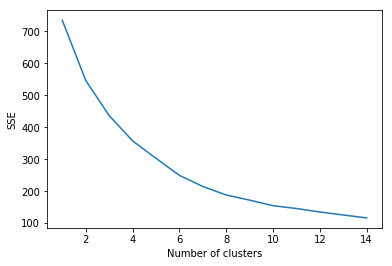

In [55]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Optimal number of clusters is 8.

In [56]:
k_means=KMeans(init='k-means++',n_clusters=8,n_init=10)

In [57]:
k_means.fit(cluster_full)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
full_data['Labels']=k_means.labels_
full_data.groupby('Labels').mean()

,Price Eur/m2,0-6%,7-15%,16-64%,65-74%,75-%,Estates total,Area/estate,Area/inhabitant,Owned flats %,Tenements %,Subsidized flats %,1-2 room %,Detached houses %
Labels,,,,,,,,,,,,,,
0,5020.250000,8.976728,8.991344,72.068331,6.581330,3.382266,3511.750000,50.564583,26.858333,25.013161,64.471167,49.166754,70.344913,6.541688
1,6741.083333,6.046126,6.071485,70.791087,10.606617,6.484686,6277.416667,67.375000,38.113889,40.066029,39.423173,3.239282,62.584085,0.686638
2,3359.445833,7.813628,9.535274,64.127974,10.602121,7.921003,12424.250000,75.524167,35.811944,46.837388,39.966099,21.866574,44.235977,32.435123
3,3491.000000,16.243655,13.959391,69.289340,0.507614,0.000000,218.000000,65.100000,25.400000,0.000000,93.577982,0.000000,45.871560,1.376147
4,3977.116667,7.140905,6.952312,67.368965,10.619227,7.918591,5702.300000,58.060000,32.093000,37.530356,54.821612,23.880154,62.765533,9.926642
5,3501.000000,8.353094,12.754443,58.456185,12.306851,8.129427,3038.000000,102.361111,40.472222,72.680697,16.456445,8.446342,14.746291,88.261031
6,5711.444444,5.040769,3.524821,78.034999,7.681557,5.717854,7120.166667,41.125000,26.127778,37.824220,49.877801,10.374141,77.412895,0.864406
7,7469.000000,6.072874,8.299595,58.906883,14.574899,12.145749,300.000000,123.800000,57.700000,40.666667,33.000000,0.000000,24.333333,1.333333


In [69]:
full_data[full_data['Labels']==0]

,Price Eur/m2,0-6%,7-15%,16-64%,65-74%,75-%,Estates total,Area/estate,Area/inhabitant,Owned flats %,Tenements %,Subsidized flats %,1-2 room %,Detached houses %,Labels
Neighborhood,,,,,,,,,,,,,,,
Hermanni,5246.0,6.977472,6.367334,73.419900,7.759700,5.475594,3989,28.733333,19.233333,17.502697,77.629450,60.056692,86.556095,0.323625,0
Kumpula,5336.0,7.470246,7.292986,74.955685,7.318308,2.962775,2204,55.100000,29.000000,27.676951,65.607985,50.272232,69.918330,9.573503,0
Vanhakaupunki,5336.0,10.630408,10.877627,71.446230,5.067985,1.977750,429,55.800000,28.200000,20.046620,61.538462,50.582751,68.065268,8.391608,0
Viikki,4163.0,10.828788,11.427431,68.451510,6.179327,3.112944,7425,62.625000,31.000000,34.826377,53.108772,35.755341,56.839959,7.878016,0


In [70]:
full_data[full_data['Labels']==1]

,Price Eur/m2,0-6%,7-15%,16-64%,65-74%,75-%,Estates total,Area/estate,Area/inhabitant,Owned flats %,Tenements %,Subsidized flats %,1-2 room %,Detached houses %,Labels
Neighborhood,,,,,,,,,,,,,,,
Eira,7227.0,7.590468,10.238305,64.872021,10.326567,6.972639,723,81.000000,41.700000,40.802213,33.886584,0.000000,47.441217,1.383126,1
Etu-Töölö,6724.0,5.609658,5.849787,70.764408,10.578975,7.197172,9730,68.100000,39.200000,40.390545,43.093525,4.594039,66.968140,0.020555,1
Kaartinkaupunki,7393.0,5.138340,5.138340,70.750988,13.142292,5.830040,773,81.900000,45.400000,39.197930,28.848642,0.000000,54.851229,0.000000,1
Kamppi,6724.0,4.865882,4.097154,75.580635,9.363755,6.092574,9065,58.300000,35.700000,35.653613,45.052399,0.805295,73.127413,0.893547,1
Katajanokka,6070.0,6.606474,7.949791,61.396168,15.701387,8.346179,2798,77.000000,40.200000,42.923517,40.743388,10.328806,55.539671,0.071480,1
Kluuvi,6724.0,3.588144,3.120125,76.755070,11.076443,5.460218,615,65.700000,39.700000,30.894309,26.666667,0.000000,54.471545,1.138211,1
Kruununhaka,6875.0,6.109843,6.391836,70.860749,10.192024,6.445549,4866,68.700000,38.100000,43.115495,40.115084,0.000000,63.111385,0.041102,1
Lauttasaari,5476.0,7.910071,7.339753,66.338802,10.898045,7.513328,14416,63.633333,34.733333,54.047881,35.309910,1.429024,57.668027,3.944257,1
Länsisatama,6931.0,8.384292,6.291903,75.134458,7.345465,2.843881,7621,64.066667,34.033333,31.321044,55.888764,19.706651,60.944077,0.000000,1


In [71]:
full_data[full_data['Labels']==2]

,Price Eur/m2,0-6%,7-15%,16-64%,65-74%,75-%,Estates total,Area/estate,Area/inhabitant,Owned flats %,Tenements %,Subsidized flats %,1-2 room %,Detached houses %,Labels
Neighborhood,,,,,,,,,,,,,,,
Kaarela,2972.666667,7.430395,8.370278,68.466040,10.530236,5.203050,15078,69.750000,32.766667,40.583294,42.035052,15.114010,46.204560,33.980874,2
Kulosaari,5141.000000,7.518987,9.848101,62.987342,9.974684,9.670886,2169,88.400000,42.800000,53.342554,30.659290,2.674043,42.508068,26.556017,2
Laajasalo,3498.333333,8.075050,9.951295,61.661501,12.441886,7.870268,9411,79.575000,36.225000,50.361488,37.872444,22.797325,38.006220,38.963954,2
Malmi,2989.000000,7.695094,8.117680,65.698072,10.512335,7.976818,14221,64.320000,33.880000,37.450490,50.654952,35.566008,54.913216,14.325115,2
Mellunkylä,2423.000000,7.753218,9.550953,64.016920,10.291197,8.387712,20303,65.720000,32.340000,34.479824,53.376758,41.581562,50.486992,15.255380,2
Munkkiniemi,4735.333333,6.567679,8.380603,63.352241,10.571683,11.127794,10885,86.766667,41.433333,49.406889,38.817152,13.252237,46.395073,21.880750,2
Oulunkylä,3505.750000,7.685162,8.728148,63.297019,10.809898,9.479774,13388,74.133333,35.800000,47.562795,40.106530,18.193054,44.081055,37.936818,2
Suurmetsä,2583.666667,8.945442,11.342702,63.846245,9.789797,6.075815,7925,78.425000,33.625000,46.222765,34.072309,27.670553,34.857801,48.768859,2
Suutarila,2576.000000,8.446960,10.307654,64.636968,10.706375,5.902043,9769,77.600000,34.766667,55.571825,35.548197,22.080490,36.801596,51.992838,2


In [72]:
full_data[full_data['Labels']==3]

,Price Eur/m2,0-6%,7-15%,16-64%,65-74%,75-%,Estates total,Area/estate,Area/inhabitant,Owned flats %,Tenements %,Subsidized flats %,1-2 room %,Detached houses %,Labels
Neighborhood,,,,,,,,,,,,,,,
Santahamina,3491.0,16.243655,13.959391,69.28934,0.507614,0.0,218,65.1,25.4,0.0,93.577982,0.0,45.87156,1.376147,3


In [73]:
full_data[full_data['Labels']==4]

,Price Eur/m2,0-6%,7-15%,16-64%,65-74%,75-%,Estates total,Area/estate,Area/inhabitant,Owned flats %,Tenements %,Subsidized flats %,1-2 room %,Detached houses %,Labels
Neighborhood,,,,,,,,,,,,,,,
Haaga,4174.500000,6.245019,5.603854,69.466783,9.737014,8.947330,17445,52.7,31.95,44.146965,48.002440,17.029543,67.321942,2.315266,4
Herttoniemi,4121.666667,7.795709,7.788115,68.574141,9.189292,6.652743,10552,55.2,32.40,23.742116,72.455687,27.448672,65.154280,2.174701,4
Konala,3363.000000,7.615579,7.853072,69.173528,9.911336,5.446485,3557,63.0,33.20,48.580264,40.961484,6.016306,51.897667,24.233905,4
Koskela,3068.000000,6.180950,8.062108,63.839952,12.779934,9.137056,1738,61.5,32.10,27.963176,67.606444,49.539701,56.444189,9.608746,4
Käpylä,5001.000000,8.311656,7.754243,63.929147,10.194475,9.810479,4629,57.6,31.40,43.378700,49.341110,19.723482,68.308490,9.764528,4
Laakso,2957.000000,5.488419,4.833837,71.701913,9.264854,8.710977,1332,49.4,30.40,41.816817,48.048048,5.705706,63.813814,0.000000,4
Pasila,4810.000000,6.345313,5.300203,68.881305,12.189400,7.283779,5240,60.2,32.10,25.697113,68.106089,20.887214,70.964439,2.555656,4
Pitäjänmäki,3928.000000,8.205252,8.229457,66.598088,9.282343,7.684860,6841,63.3,32.68,38.518576,48.859503,26.979589,57.789716,19.292121,4
Pukinmäki,3012.000000,8.015769,6.892844,64.723450,11.993788,8.374149,4818,61.8,33.60,42.424242,50.415110,31.257783,55.811540,10.377750,4


In [74]:
full_data[full_data['Labels']==5]

,Price Eur/m2,0-6%,7-15%,16-64%,65-74%,75-%,Estates total,Area/estate,Area/inhabitant,Owned flats %,Tenements %,Subsidized flats %,1-2 room %,Detached houses %,Labels
Neighborhood,,,,,,,,,,,,,,,
Pakila,3524.5,7.956722,12.255841,59.373803,11.585599,8.828035,4546,99.050000,39.850000,77.485431,8.897038,0.162707,15.591627,90.039465,5
Tammisalo,3612.0,7.754370,12.102196,55.939041,13.357239,10.847154,994,110.400000,45.900000,78.470825,9.758551,0.000000,15.995976,81.287726,5
Tuomarinkylä,3366.5,9.348189,13.905292,60.055710,11.977716,4.713092,3574,97.633333,35.666667,62.085835,30.713746,25.176320,12.651272,93.455902,5


In [75]:
full_data[full_data['Labels']==6]

,Price Eur/m2,0-6%,7-15%,16-64%,65-74%,75-%,Estates total,Area/estate,Area/inhabitant,Owned flats %,Tenements %,Subsidized flats %,1-2 room %,Detached houses %,Labels
Neighborhood,,,,,,,,,,,,,,,
Alppiharju,5676.000000,2.866059,1.453560,83.329227,7.464893,4.886261,9633,38.450000,28.300000,38.045250,51.774117,2.596388,91.843329,0.829817,6
Kallio,5687.000000,3.266203,2.024126,81.665304,7.968718,5.075649,14863,43.966667,29.966667,36.428123,51.912949,0.837170,89.558493,0.060687,6
Meilahti,5921.000000,5.693602,5.576208,75.132068,7.924085,5.674036,3564,51.400000,32.100000,39.309764,46.829405,1.879910,73.681257,1.318743,6
Ruskeasuo,5300.000000,6.446169,5.433682,71.954101,7.323658,8.842389,1845,27.600000,15.800000,42.981030,45.474255,14.634146,62.547425,2.005420,6
Sörnäinen,6008.666667,5.443980,3.160363,76.287083,9.175247,5.933327,6420,37.433333,21.100000,33.439437,47.100345,16.515495,68.297770,0.815419,6
Vallila,5676.000000,6.528600,3.500986,79.842209,6.232742,3.895464,6396,47.900000,29.500000,36.741714,56.175735,25.781739,78.549093,0.156348,6


In [76]:
full_data[full_data['Labels']==7]

,Price Eur/m2,0-6%,7-15%,16-64%,65-74%,75-%,Estates total,Area/estate,Area/inhabitant,Owned flats %,Tenements %,Subsidized flats %,1-2 room %,Detached houses %,Labels
Neighborhood,,,,,,,,,,,,,,,
Kaivopuisto,7469.0,6.072874,8.299595,58.906883,14.574899,12.145749,300,123.8,57.7,40.666667,33.0,0.0,24.333333,1.333333,7


# Regression

In [ ]:
full_data.columns

In [43]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [44]:
regr=linear_model.LinearRegression()

In [45]:
Y=np.asanyarray(full_data['Price Eur/m2'])
X=np.asanyarray(full_data[['0-6%', '7-15%', '16-64%', '65-74%',
                           '75-%','Area/estate', 'Area/inhabitant',
                           'Owned flats %', 'Tenements %', 'Subsidized flats %', '1-2 room %']])

In [46]:
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
Y_est=regr.predict(X)

In [48]:
r2_score(Y_est,Y)

0.6126739068978968

# Choropleth

In [ ]:
from lxml import etree

In [ ]:
parsed = etree.parse("Kaupunginosajako.kml")

In [ ]:
root=parsed.getroot()

In [ ]:
for sel1 in root.iterchildren():
    print(sel1.tag.rsplit("}")[1])
    for sel2 in sel1.iterchildren():
        print("    {}".format(sel2.tag.rsplit("}")[1]))
        for sel3 in sel2.iterchildren():
            print("        {}".format(sel3.tag.rsplit("}")[1]))
            for sel4 in sel3.iterchildren():
                print("            {}".format(sel4.tag.rsplit("}")[1]))
                for sel5 in sel4.iterchildren():
                    print("                {}".format(sel5.tag.rsplit("}")[1]))

In [ ]:
root=root[0][1]

In [ ]:
header="""{
\"type\": \"FeatureCollection\",
\"features\": ["""
footer="""
]
}"""

In [ ]:
polygon_start="""\n{{\"type\": \"Feature\",\"properties\": {{\"name\":\"{}\"}},\"geometry\": {{\"type\": \"Polygon\",\"coordinates\":[["""    
polygon_end="""]]}}"""

In [ ]:
loppu=len(root)
print(header)
for loop in range(1,loppu):
    print(polygon_start.format(root[loop][0][0][4].text),end='')
    coordinates=root[loop][1][0][0][1].text.split(' ')
    for ll in coordinates[:-2]:
        print("[{}],".format(ll),end='')
    print("[{}]".format(coordinates[-1]),end='')
    print(polygon_end,end='')
    if loop<=loppu:
        print(',',end='')
print(footer)

In [49]:
import folium

In [50]:
map=folium.Map(location=[60.1,25],zoom_start=10)
geo=r'hesa.geojson'
map.choropleth(geo_data=geo,data=full_data,columns=[full_data.index.get_level_values(0),'Labels'],
               fill_color='YlOrRd',key_on='feature.properties.name')

/Users/markku/anaconda3/lib/python3.7/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [51]:
map